# Analyse décès sur le territoire Français

Une analyse des impacts globaux du covid en s'abstrayant des biais de tests

In [3]:
# Generic imports
import pandas as pd
import matplotlib.pyplot as plt

## data crunching

In [14]:
# Data from insee
# https://insee.fr/fr/information/4470857
insee_file = "2020-04-05_deces_quotidiens_departement_csv.csv"
df_insee = pd.read_csv("./Data_FR_Deaths/" + insee_file, delimiter=";", index_col="Date_evenement")
df_insee

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01/03/2020,France,1624.0,1774.0,1708,1872,1928,2136
02/03/2020,France,3261.0,3551.0,3467,3782,3933,4327
03/03/2020,France,4888.0,5309.0,5035,5530,5881,6455
04/03/2020,France,6564.0,7109.0,6747,7410,7768,8545
05/03/2020,France,8187.0,8875.0,8455,9278,9770,10746
...,...,...,...,...,...,...,...
26/04/2020,Dept_976,NaN,NaN,135,135,103,103
27/04/2020,Dept_976,NaN,NaN,138,138,105,105
28/04/2020,Dept_976,NaN,NaN,143,143,107,107


### Vérification de l'intégrité des sommes

In [17]:
check = df_insee[df_insee.loc[:,"Zone"]=="France"]

In [21]:
check_2 = df_insee[df_insee.loc[:,"Zone"]!="France"].groupby('Date_evenement').sum()

In [22]:
check_2

,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,
01/03/2020,1624.0,1774.0,1708,1872,1928,2136
01/04/2020,60253.0,65217.0,50489,55319,56559,62189
02/03/2020,3261.0,3551.0,3467,3782,3933,4327
02/04/2020,62664.0,67827.0,52046,57020,58114,63904
03/03/2020,4888.0,5309.0,5035,5530,5881,6455
...,...,...,...,...,...,...
29/03/2020,52713.0,57067.0,46009,50375,51728,56836
29/04/2020,0.0,0.0,92495,101226,99472,109279
30/03/2020,55183.0,59725.0,47484,52012,53365,58641


In [36]:
check_3 = check.join(check_2, rsuffix="_sum",)[["Total_deces_2020","Total_deces_2019","Total_deces_2018", "Total_deces_2020_sum","Total_deces_2019_sum","Total_deces_2018_sum"]]

In [33]:
(check_3["Total_deces_2020"]-check_3["Total_deces_2020_sum"]).describe()

count    51.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [34]:
(check_3["Total_deces_2019"]-check_3["Total_deces_2019_sum"]).describe()

count    61.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [37]:
(check_3["Total_deces_2018"]-check_3["Total_deces_2018_sum"]).describe()

count    61.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

### filtrage et reformation du df insee

In [49]:
df_insee = df_insee[df_insee["Zone"]=="France"][["Total_deces_2020","Total_deces_2019","Total_deces_2018"]]

In [58]:
df_insee.columns=[2020,2019,2018]
df_insee.sort_index(axis=1,inplace=True)

In [74]:
# our main dataframe to compile all data 2020 and before 
df_wp = df_insee.diff()
df_wp.index = pd.to_datetime(df_wp.index, dayfirst=True)

In [84]:
df_wp.loc["2020/03/01",:]=df_insee.loc["01/03/2020",:]

In [85]:
df_wp

,2018,2019,2020
Date_evenement,,,
2020-03-01,2136.0,1872.0,1774.0
2020-03-02,2191.0,1910.0,1777.0
2020-03-03,2128.0,1748.0,1758.0
2020-03-04,2090.0,1880.0,1800.0
2020-03-05,2201.0,1868.0,1766.0
...,...,...,...
2020-04-26,1557.0,1620.0,NaN
2020-04-27,1569.0,1562.0,NaN
2020-04-28,1583.0,1589.0,NaN


## Données de références

In [251]:
# données historiques
df_histo_csv = pd.read_csv("./Data_FR_Deaths/" + 'histo_deces.csv', index_col = 0)
# remove badly formatted data and before 2000
df_histo_csv = df_histo_csv.filter(regex = '2[0-9]{3}\-[0-1][0-9]\-[0-3][0-9]', axis=0)
# transform index into dates
df_histo_csv.index = pd.to_datetime(df_histo_csv.index, format = "%Y-%m-%d")
# Add info for reference
df_histo_csv.reset_index(inplace=True)
#df_histo_csv['date_deces'].apply(np.year)
df_histo_csv['year'] = pd.DatetimeIndex(df_histo_csv['date_deces']).year
df_histo_csv['week'] = pd.DatetimeIndex(df_histo_csv['date_deces']).week
df_histo_csv['dow'] = pd.DatetimeIndex(df_histo_csv['date_deces']).weekday  + 1
df_histo_csv['concat'] = df_histo_csv['year'].astype('str') + "-" + df_histo_csv['week'].astype('str') + "-" + df_histo_csv['dow'].astype('str')
df_histo_csv['ref_yoy'] = (df_histo_csv['year']-1).astype('str') + "-" + df_histo_csv['week'].astype('str') + "-" + df_histo_csv['dow'].astype('str')
#df_histo_csv['key'] = df_histo_csv['year'] #+ df_histo_csv['week']+"-"+df_histo_csv['dow']
df_histo_csv['ref'] =  df_histo_csv['week'].astype('str') + "-" + df_histo_csv['dow'].astype('str')


In [252]:
df_histo_csv

,date_deces,nbr_deces,year,week,dow,concat,ref_yoy,ref
0,2000-01-01,1974,2000,52,6,2000-52-6,1999-52-6,52-6
1,2000-01-02,2040,2000,52,7,2000-52-7,1999-52-7,52-7
2,2000-01-03,2086,2000,1,1,2000-1-1,1999-1-1,1-1
3,2000-01-04,2080,2000,1,2,2000-1-2,1999-1-2,1-2
4,2000-01-05,2039,2000,1,3,2000-1-3,1999-1-3,1-3
...,...,...,...,...,...,...,...,...
7390,2020-03-26,1647,2020,13,4,2020-13-4,2019-13-4,13-4
7391,2020-03-27,1178,2020,13,5,2020-13-5,2019-13-5,13-5
7392,2020-03-28,853,2020,13,6,2020-13-6,2019-13-6,13-6
7393,2020-03-29,559,2020,13,7,2020-13-7,2019-13-7,13-7


### Date for 2020 and references

In [207]:
import datetime
base = datetime.datetime.fromisoformat("2020-01-01")
date_list = [base + datetime.timedelta(days=x) for x in range(365)]

In [246]:
df_histo = pd.DataFrame(date_list)
df_histo.columns = ['date_ref']
df_histo['year'] = pd.DatetimeIndex(df_histo['date_ref']).year
df_histo['week'] = pd.DatetimeIndex(df_histo['date_ref']).week
df_histo['dow'] = pd.DatetimeIndex(df_histo['date_ref']).weekday  + 1
df_histo['concat'] = df_histo['year'].astype('str') + "-" + df_histo['week'].astype('str') + "-" + df_histo['dow'].astype('str')
df_histo['ref_yoy'] = (df_histo['year']-1).astype('str') + "-" + df_histo['week'].astype('str') + "-" + df_histo['dow'].astype('str')
df_histo['ref'] = df_histo['week'].astype('str') + "-" + df_histo['dow'].astype('str')


In [255]:
df_histo.set_index('ref', inplace=True)

In [256]:
# Join the rest
df_histo.join(df_histo_csv[df_histo_csv['year']=='2019'], on=['ref'],rsuffix='_2019', how='left')

/usr/local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,date_ref,year,week,dow,concat,ref_yoy,date_deces,nbr_deces,year_2019,week_2019,dow_2019,concat_2019,ref_yoy_2019,ref
ref,,,,,,,,,,,,,,
1-3,2020-01-01,2020,1,3,2020-1-3,2019-1-3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-4,2020-01-02,2020,1,4,2020-1-4,2019-1-4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-5,2020-01-03,2020,1,5,2020-1-5,2019-1-5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-6,2020-01-04,2020,1,6,2020-1-6,2019-1-6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-7,2020-01-05,2020,1,7,2020-1-7,2019-1-7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52-6,2020-12-26,2020,52,6,2020-52-6,2019-52-6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52-7,2020-12-27,2020,52,7,2020-52-7,2019-52-7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53-1,2020-12-28,2020,53,1,2020-53-1,2019-53-1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
df_histo

,date_ref,year,week,dow,concat,ref_yoy
0,2020-01-01,2020,1,3,2020-1-3,2019-1-3
1,2020-01-02,2020,1,4,2020-1-4,2019-1-4
2,2020-01-03,2020,1,5,2020-1-5,2019-1-5
3,2020-01-04,2020,1,6,2020-1-6,2019-1-6
4,2020-01-05,2020,1,7,2020-1-7,2019-1-7
...,...,...,...,...,...,...
360,2020-12-26,2020,52,6,2020-52-6,2019-52-6
361,2020-12-27,2020,52,7,2020-52-7,2019-52-7
362,2020-12-28,2020,53,1,2020-53-1,2019-53-1
363,2020-12-29,2020,53,2,2020-53-2,2019-53-2


In [ ]:
df_histo_csv.join()

In [130]:
#dummy historical data
import numpy as np

#df_histo = pd.DataFrame(np.random.randint(1500,2000,size=(365, 19)),columns=range(1998,2017))

In [131]:
df_histo['max'] = df_histo.max(axis=1)
df_histo['min'] = df_histo.min(axis=1)

In [132]:
import datetime
base = datetime.datetime.fromisoformat("2020-01-01")
date_list = [base + datetime.timedelta(days=x) for x in range(365)]
df_histo.index = date_list

In [133]:
df_histo

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,max,min
2020-01-01,1547,1539,1972,1842,1669,1936,1912,1940,1702,1949,...,1544,1937,1650,1551,1700,1986,1653,1759,1986,1539
2020-01-02,1756,1920,1954,1808,1647,1690,1582,1872,1676,1967,...,1868,1842,1930,1629,1528,1876,1998,1887,1998,1528
2020-01-03,1676,1742,1669,1884,1537,1597,1727,1829,1915,1813,...,1752,1719,1705,1562,1794,1946,1681,1805,1946,1537
2020-01-04,1998,1663,1897,1764,1702,1682,1978,1666,1824,1815,...,1898,1636,1992,1883,1938,1503,1614,1856,1998,1503
2020-01-05,1598,1997,1811,1997,1945,1783,1617,1578,1643,1964,...,1658,1633,1770,1677,1817,1868,1703,1985,1997,1578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,1667,1954,1922,1727,1833,1715,1681,1649,1585,1552,...,1948,1792,1587,1701,1827,1589,1824,1927,1986,1552
2020-12-27,1741,1717,1985,1614,1677,1576,1658,1682,1959,1519,...,1963,1805,1653,1912,1710,1619,1950,1838,1985,1519
2020-12-28,1691,1918,1517,1720,1530,1854,1593,1721,1565,1875,...,1875,1537,1668,1635,1627,1778,1788,1725,1918,1517
2020-12-29,1947,1557,1886,1635,1792,1923,1792,1699,1633,1955,...,1873,1514,1839,1571,1554,1882,1966,1853,1966,1514


## Comparaison décès par jour 2020 vs références

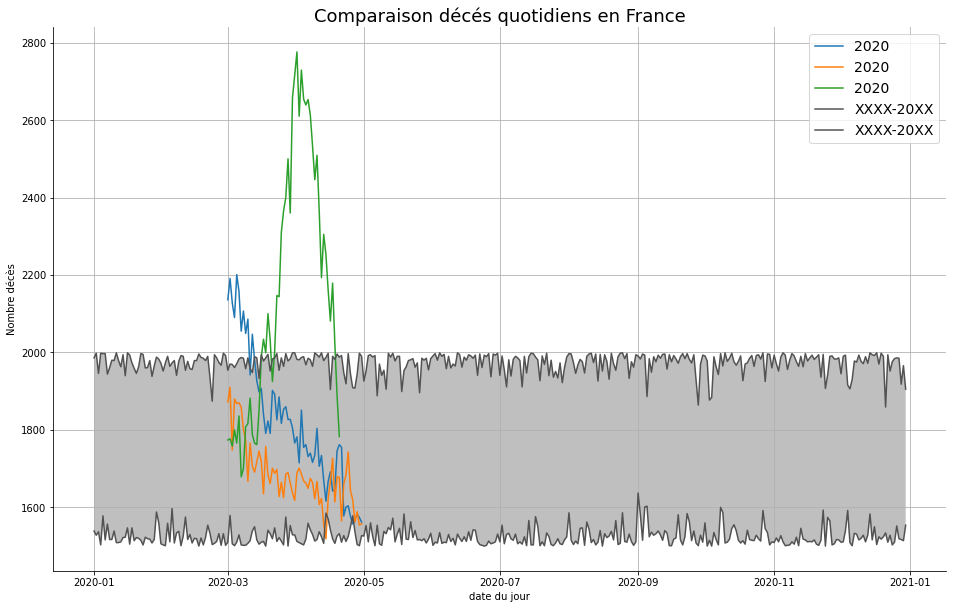

In [140]:

fig, ax = plt.subplots(figsize=(16,10))
# courbe 2020
#ax = df_wp.plot(kind="line", figsize=(16,10))
ax.plot(df_wp, label='2020')


# defining area of reference
# ##########################

# Boundaries
ax.plot(df_histo[['min','max']], label='XXXX-20XX', color="#525252" )
# fill
ax.fill_between(date_list, df_histo['min'], df_histo['max'], facecolor='grey', alpha=0.5)


# layout
plt.title("Comparaison décés quotidiens en France", fontsize=18)
ax.set_xlabel("date du jour")
ax.set_ylabel("Nombre décès")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.savefig("deces.png")
#plt.show()